## Single Neuron Model to Convert Celsius to Farenheit

* In this project, we will build a simple machine learning model to convert from <em>celsius to fahrenheit</em>.
* The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**
* For Example, let's convert 0°C celsius temperature to Fahrenheit: **(0°C × 9/5) + 32 = 32°F**


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Thermometer_CF.svg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Convert Celsius to Fahrenheit [Image Source: https://commons.wikimedia.org/wiki/File:Thermometer_CF.svg]
  </td></tr>
</table>

In [1]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf

In [2]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

### Load the dataset

In [4]:
temperature_df = pd.read_csv("./resources/Celsius-to-Fahrenheit.csv")
temperature_df.reset_index(drop=True, inplace=True)

temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [5]:
# dataframe structure

temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
# summary statistics

temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


### Visualize the dataset

Text(0.5, 1.0, 'Celsius vs Fahrenheit')

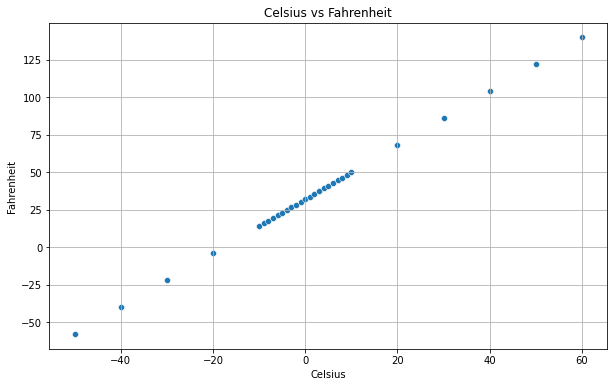

In [7]:
plt.figure(figsize=(10, 6))
plt.grid()
sns.scatterplot(x='Celsius', y='Fahrenheit', data=temperature_df)
plt.title("Celsius vs Fahrenheit")

### Creating training and test dataset

In [8]:
# The dataset is so simple, we dont have a test dataset
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

### Build and train the model

In [9]:
X_train.shape

(30,)

In [10]:
y_train.shape

(30,)

In [11]:
# build the model

model = tf.keras.models.Sequential()
# This will have only one layer with one neuron
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

2022-07-12 13:52:05.314139: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Check the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.9), loss='mean_squared_error')

In [14]:
# train the model

epochs_hist = model.fit(X_train, y_train, epochs=100)

2022-07-12 13:52:09.984280: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
1/1 [==============================] - 0s 288ms/step - loss: 2801.5029
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1440.8357
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 913.2850
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 1011.5443
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 1281.0647
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 1357.6447
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 1204.6813
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 945.6688
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 710.3854
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 578.5656
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 562.9970
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 616.3747
Epoch 13/100
1/1 [===========

### Evaluating the model

In [15]:
# lets visualize the loss
epochs_hist.history.keys()

dict_keys(['loss'])

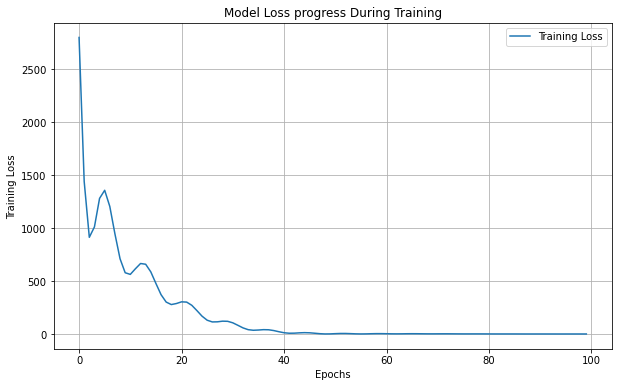

In [16]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss progress During Training")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend(['Training Loss'])

In [17]:
# Now get the optimum weights the model has decided

model.get_weights()

[array([[1.8024687]], dtype=float32), array([31.94281], dtype=float32)]

In [18]:
# we will use this model for prediction

Temp_C = 0

Temp_F = model.predict([Temp_C])
print("Temperature in degF using the trained ANN = ", Temp_F)

Temperature in degF using the trained ANN =  [[31.94281]]
